In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np

In [2]:
start=datetime(2015,1,1)
end=datetime(2020,9,27)

In [3]:
dis=web.DataReader('TSLA','yahoo',start=start,end=end)
dis

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,15.045333,14.816667,14.872667,14.827333,34462500.0,14.827333
2015-01-02,14.883333,14.217333,14.858000,14.620667,71466000.0,14.620667
2015-01-05,14.433333,13.810667,14.303333,14.006000,80527500.0,14.006000
2015-01-06,14.280000,13.614000,14.004000,14.085333,93928500.0,14.085333
2015-01-07,14.318667,13.985333,14.223333,14.063333,44526000.0,14.063333
...,...,...,...,...,...,...
2020-09-21,151.893326,135.690002,151.043335,149.796661,328430400.0,149.796661
2020-09-22,145.919998,139.199997,143.199997,141.410004,238742400.0,141.410004
2020-09-23,137.383331,125.293335,135.053329,126.786667,285222600.0,126.786667


In [4]:
returns=100*dis.Close.pct_change().dropna()
returns

Date
2015-01-02    -1.393818
2015-01-05    -4.204103
2015-01-06     0.566424
2015-01-07    -0.156193
2015-01-08    -0.156431
                ...    
2020-09-21     1.637451
2020-09-22    -5.598695
2020-09-23   -10.341091
2020-09-24     1.953415
2020-09-25     5.041385
Name: Close, Length: 1444, dtype: float64

Text(0.5, 1.0, 'Tesla Return')

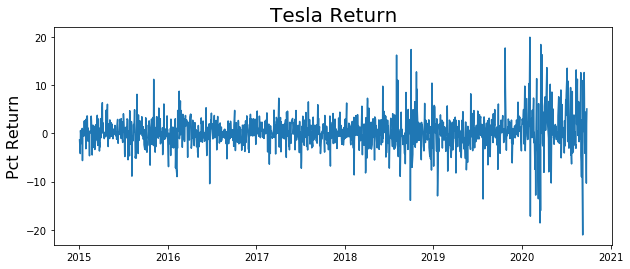

In [5]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Tesla Return', fontsize=20)

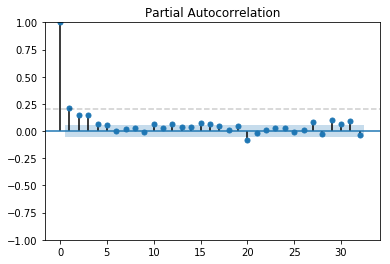

In [6]:
#Partial Auto correlation
plot_pacf(returns**2,method='ywm')
plt.axhline(0.20,color='k',linestyle='--',alpha=0.2)
plt.show()

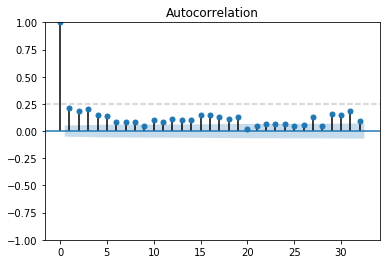

In [7]:
#Partial Auto correlation
plot_acf(returns**2)
plt.axhline(0.25,color='k',linestyle='--',alpha=0.2)
plt.show()

In [8]:
#Fit Garch(3,3) model
model=arch_model(returns,p=3,q=0)

In [9]:
model_fit=model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4471.897876056582
Iteration:      2,   Func. Count:     15,   Neg. LLF: 6791.112339695448
Iteration:      3,   Func. Count:     23,   Neg. LLF: 5137.060930052737
Iteration:      4,   Func. Count:     30,   Neg. LLF: 11094.94331351783
Iteration:      5,   Func. Count:     37,   Neg. LLF: 9114.001320571695
Iteration:      6,   Func. Count:     44,   Neg. LLF: 13193.946993838363
Iteration:      7,   Func. Count:     52,   Neg. LLF: 3770.913451304843
Iteration:      8,   Func. Count:     59,   Neg. LLF: 3737.2804155383196
Iteration:      9,   Func. Count:     66,   Neg. LLF: 3714.2632872613385
Iteration:     10,   Func. Count:     72,   Neg. LLF: 3714.2540537436307
Iteration:     11,   Func. Count:     78,   Neg. LLF: 3714.2535281452338
Iteration:     12,   Func. Count:     84,   Neg. LLF: 3714.2535124759347
Iteration:     13,   Func. Count:     90,   Neg. LLF: 3714.253510425317
Iteration:     14,   Func. Count:     95,   Neg. LLF: 3714

In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3714.25
Distribution:                  Normal   AIC:                           7438.51
Method:            Maximum Likelihood   BIC:                           7464.88
                                        No. Observations:                 1444
Date:                Tue, Sep 27 2022   Df Residuals:                     1443
Time:                        22:36:13   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2023  8.718e-02      2.320  2.034e-02 [3.139e-02,  0.373]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          6.0237      0.771      7.812  5.649e-15   [  4.512,  7.535]
alpha[1]       0.0868  3.164e-02      2.743  6.087e-03 [2.477e-02,  0.149]
alpha[2]       0.1781  6.576e-02      2.708  6.767e-03 [4.920e-02,  0.307]
alpha[3]       0.2593  8.187e-02      3.167  1.541e-03 [9.880e-02,  0.420]
==========================================================================

Covariance estimator: robust
"""

In [11]:
pred=model_fit.forecast(horizon=1,reindex=False)
np.sqrt(pred.variance.values)

array([[6.11734158]])

In [12]:
#Rolling_predictions
rolling_predictions=[]
test_size=365

for i in range(test_size):
    train=returns[:-(test_size-i)]
    model=arch_model(train.values,p=3,q=0)
    model_fit=model.fit(disp='off')
    pred=model_fit.forecast(horizon=1,reindex=False)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [13]:
rolling_predictions=pd.Series(rolling_predictions,index=returns.index[-365:])

Text(0.5, 1.0, 'Dis return')

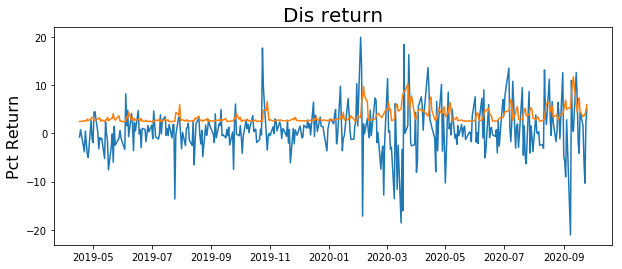

In [14]:
plt.figure(figsize=(10,4))
plt.plot(returns[-test_size:])
plt.plot(rolling_predictions)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Dis return', fontsize=20)

In [15]:
pred=model_fit.forecast(horizon=7,reindex=False)

In [16]:
future_dates=[returns.index[-1]+timedelta(days=i) for i in range(1,10) if i != 1 and i !=2]
future_dates

[Timestamp('2020-09-28 00:00:00'),
 Timestamp('2020-09-29 00:00:00'),
 Timestamp('2020-09-30 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-10-02 00:00:00'),
 Timestamp('2020-10-03 00:00:00'),
 Timestamp('2020-10-04 00:00:00')]

In [17]:
pred=pd.Series(np.sqrt(pred.variance.values[-1,:]),index=future_dates)
pred

2020-09-28    5.906433
2020-09-29    6.199859
2020-09-30    4.048121
2020-10-01    4.833850
2020-10-02    4.577284
2020-10-03    4.033289
2020-10-04    4.152168
dtype: float64

Text(0.5, 1.0, 'Volatolity Prediction - Next 7 Days')

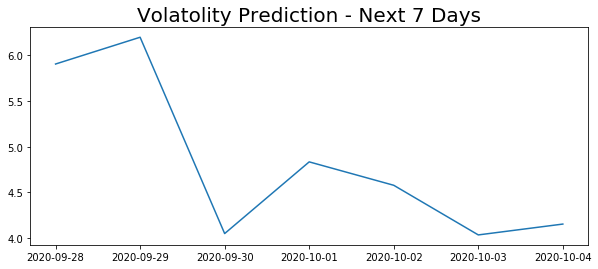

In [18]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatolity Prediction - Next 7 Days',fontsize=20)

In [19]:
dis=web.DataReader('TSLA','yahoo',start=start,end=end+timedelta(days=10))
dis

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,15.045333,14.816667,14.872667,14.827333,34462500.0,14.827333
2015-01-02,14.883333,14.217333,14.858000,14.620667,71466000.0,14.620667
2015-01-05,14.433333,13.810667,14.303333,14.006000,80527500.0,14.006000
2015-01-06,14.280000,13.614000,14.004000,14.085333,93928500.0,14.085333
2015-01-07,14.318667,13.985333,14.223333,14.063333,44526000.0,14.063333
...,...,...,...,...,...,...
2020-10-01,149.626663,144.806671,146.919998,149.386673,152224500.0,149.386673
2020-10-02,146.376663,138.333328,140.463333,138.363327,214290000.0,138.363327
2020-10-05,144.546661,139.776672,141.116669,141.893326,134168400.0,141.893326


In [20]:
returns=100*dis.Close.pct_change().dropna()
returns

Date
2015-01-02   -1.393818
2015-01-05   -4.204103
2015-01-06    0.566424
2015-01-07   -0.156193
2015-01-08   -0.156431
                ...   
2020-10-01    4.463775
2020-10-02   -7.379069
2020-10-05    2.551253
2020-10-06   -2.748539
2020-10-07    2.734430
Name: Close, Length: 1452, dtype: float64

Text(0.5, 1.0, 'Volatolity Prediction - Next 7 Days')

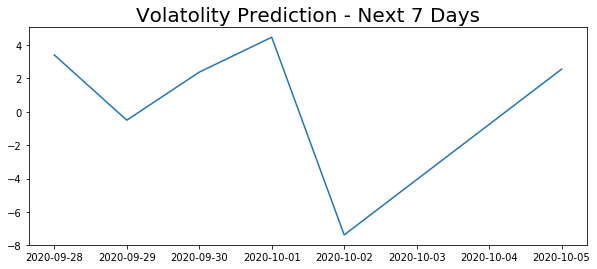

In [27]:
plt.figure(figsize=(10,4))
plt.plot(returns[-8:-2])
plt.title('Volatolity Prediction - Next 7 Days',fontsize=20)

In [23]:
returns[-10:]

Date
2020-09-24    1.953415
2020-09-25    5.041385
2020-09-28    3.402559
2020-09-29   -0.505692
2020-09-30    2.371912
2020-10-01    4.463775
2020-10-02   -7.379069
2020-10-05    2.551253
2020-10-06   -2.748539
2020-10-07    2.734430
Name: Close, dtype: float64